In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/marketing datasets/KAG_conversion_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('/content/drive/MyDrive/marketing datasets/KAG_conversion_data.csv')

In [81]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


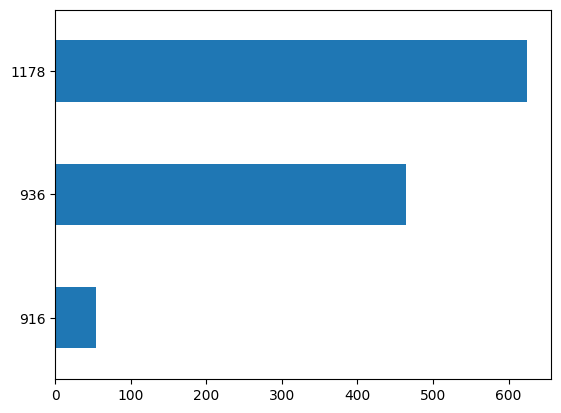

In [82]:
df['xyz_campaign_id'].value_counts().sort_values(ascending=True).plot(kind='barh');

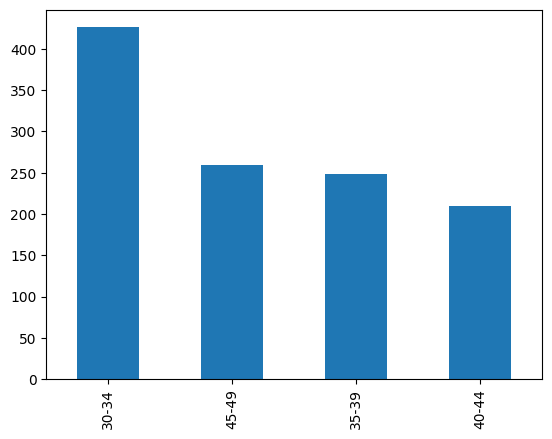

In [83]:
df['age'].value_counts().plot(kind='bar');

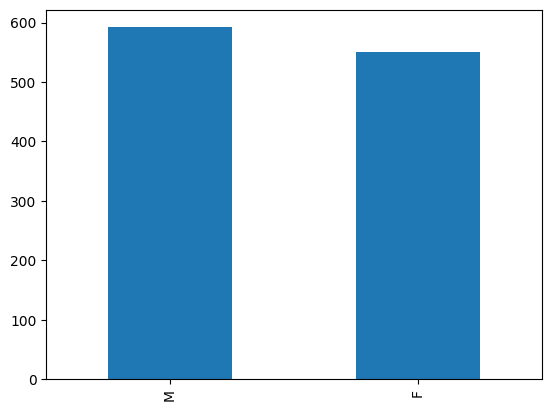

In [84]:
df['gender'].value_counts().plot(kind='bar');

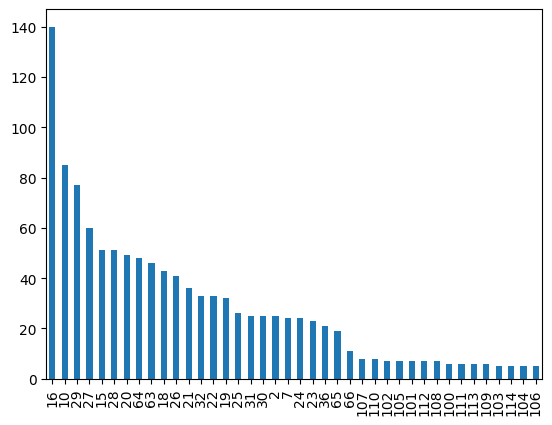

In [85]:
df['interest'].value_counts().plot(kind='bar');

In [86]:
df['conv1'] = np.where(df['Total_Conversion'] != 0, 1, 0)
df['conv2'] = np.where(df['Approved_Conversion'] != 0, 1, 0)

In [87]:
def filter_interest(df, column_name, threshold=0.8, new_column_name='filtered_interest'):
    value_counts = df[column_name].value_counts()
    total_count = value_counts.sum()
    cum_count = 0
    keep_values = []

    for value, count in value_counts.items():
        cum_count += count
        if cum_count / total_count <= threshold:
            keep_values.append(value)
        else:
            break

    filtered_df = df.copy()
    filtered_df[new_column_name] = filtered_df[column_name].apply(lambda x: x if x in keep_values else 'other')
    return filtered_df

In [88]:
df = filter_interest(df, 'interest', threshold=0.8, new_column_name='pareto_interest')

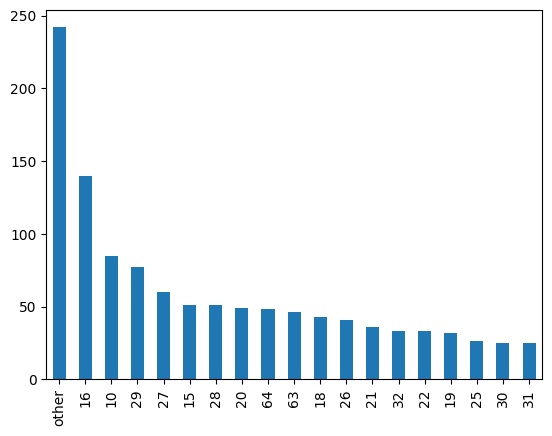

In [89]:
df['pareto_interest'].value_counts().plot(kind='bar');

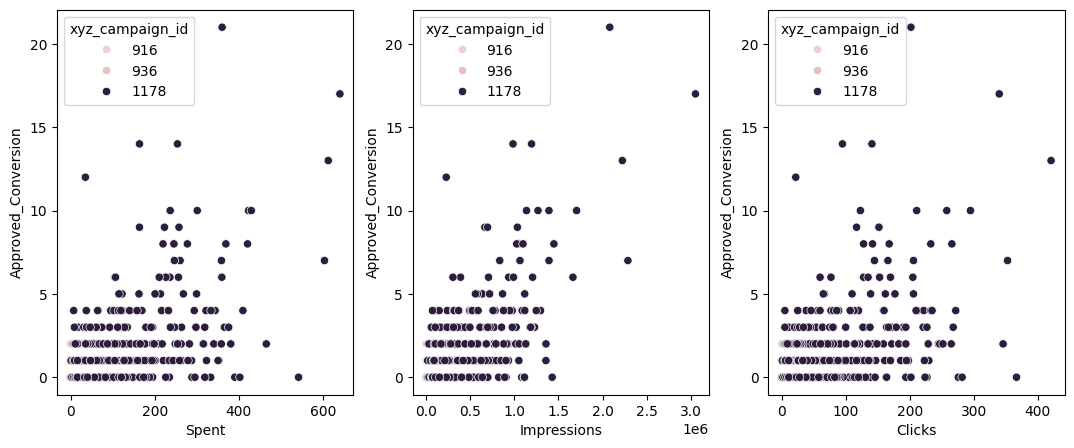

In [90]:
Fig, Axes = plt.subplots(1,3, figsize=(13,5))
sns.scatterplot(data=df, x='Spent', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[0])
sns.scatterplot(data=df, x='Impressions', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[1])
sns.scatterplot(data=df, x='Clicks', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[2]);

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  conv1                1143 non-null   int64  
 12  conv2                1143 non-null   int64  
 13  pareto_interest      1143 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 125.1+ KB


In [92]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,conv1,conv2,pareto_interest
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1,1,15
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1,0,16
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1,0,20
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1,0,28
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1,1,28


In [93]:
age_dummies = pd.get_dummies(df['age'])
gender_dummies = pd.get_dummies(df['gender'])
campaign_dummies = pd.get_dummies(df['xyz_campaign_id'])
pareto_interest_dummies = pd.get_dummies(df['pareto_interest'], prefix='int')

In [94]:
df2 = pd.concat([df, age_dummies, gender_dummies, campaign_dummies, pareto_interest_dummies], axis=1).drop(['age', 'gender', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'pareto_interest'], axis=1).set_index('ad_id')

In [95]:
df2.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,conv1,conv2,30-34,35-39,40-44,...,int_26,int_27,int_28,int_29,int_30,int_31,int_32,int_63,int_64,int_other
ad_id,,,,,,,,,,,,,,,,,,,,,
708746,7350,1,1.43,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
708749,17861,2,1.82,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
708771,693,0,0.00,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
708815,4259,1,1.25,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
708818,4133,1,1.29,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
corr = df2.corr()

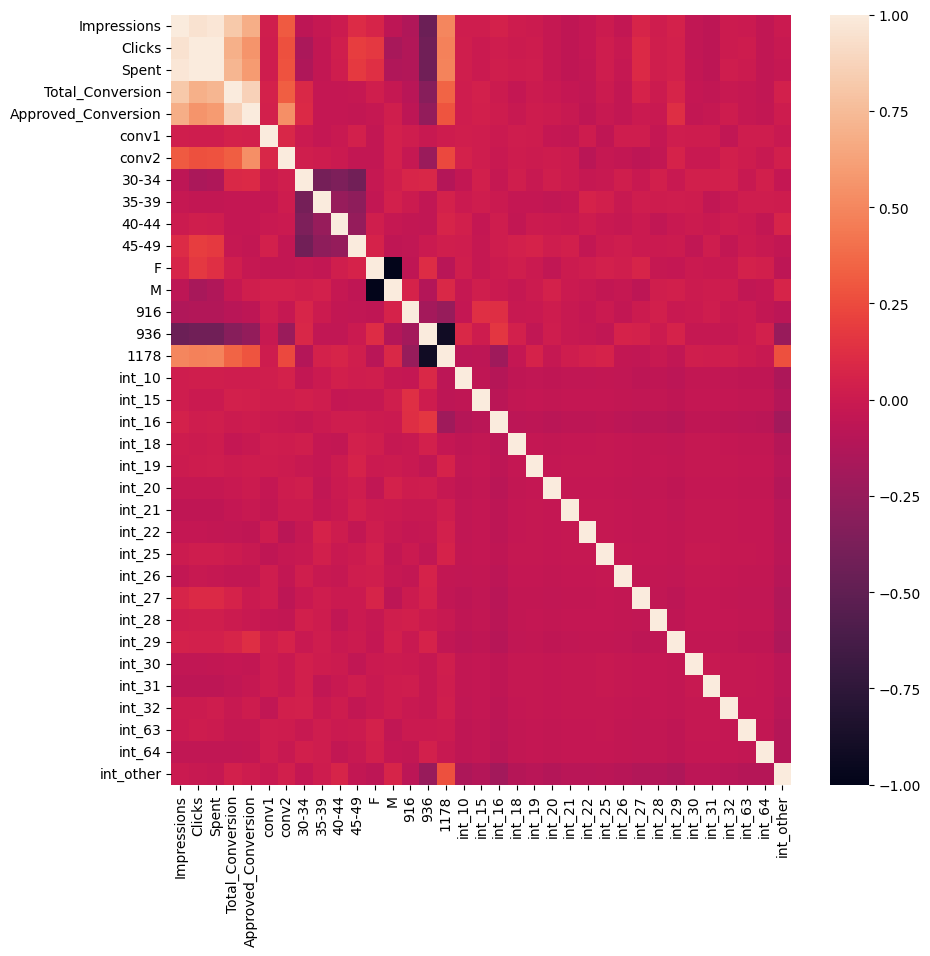

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

Regression Part

In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [99]:
df2.columns

Index([        'Impressions',              'Clicks',               'Spent',
          'Total_Conversion', 'Approved_Conversion',               'conv1',
                     'conv2',               '30-34',               '35-39',
                     '40-44',               '45-49',                   'F',
                         'M',                   916,                   936,
                        1178,              'int_10',              'int_15',
                    'int_16',              'int_18',              'int_19',
                    'int_20',              'int_21',              'int_22',
                    'int_25',              'int_26',              'int_27',
                    'int_28',              'int_29',              'int_30',
                    'int_31',              'int_32',              'int_63',
                    'int_64',           'int_other'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:       Total_Conversion   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          2.21e-313
Time:                        16:27:47   Log-Likelihood:                -2542.6
No. Observations:                1143   AIC:                             5141.
Df Residuals:                    1115   BIC:                             5282.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3491      0.061      5.745      

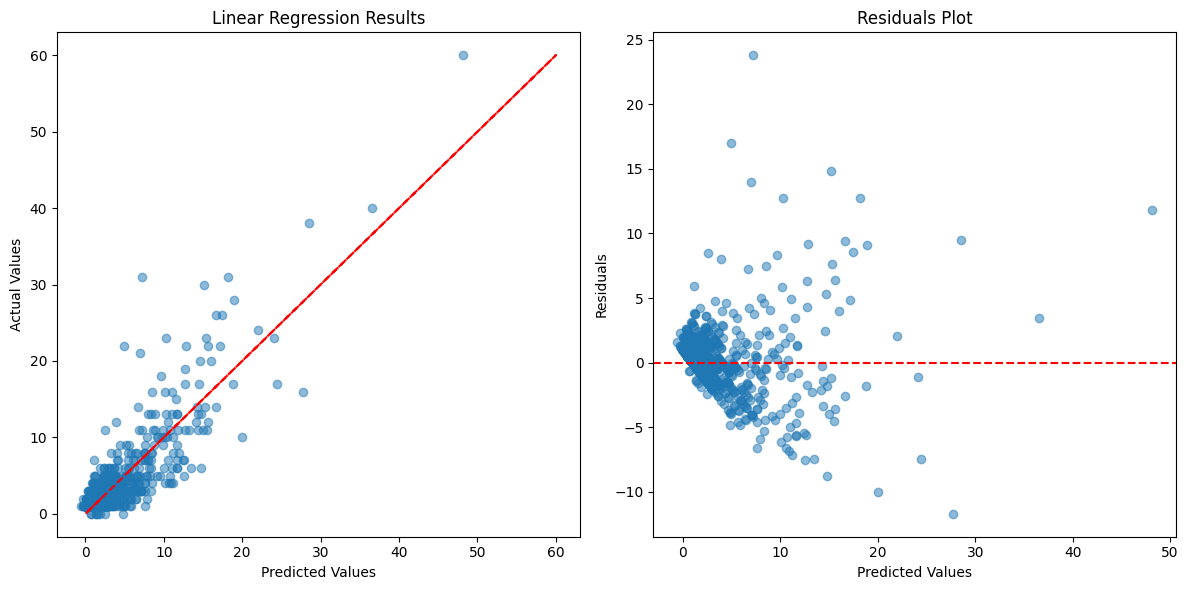

In [100]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Total_Conversion']]

# Add constant column to X
X = sm.add_constant(X)

# Train the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Plot the predicted values vs. actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values
ax[0].scatter(results.predict(), Y, alpha=0.5)
ax[0].plot(Y, Y, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Linear Regression Results')

# Plot residuals
residuals = results.resid
ax[1].scatter(results.predict(), residuals, alpha=0.5)
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.576
Model:                             OLS   Adj. R-squared:                  0.565
Method:                  Least Squares   F-statistic:                     56.03
Date:                 Fri, 22 Mar 2024   Prob (F-statistic):          4.08e-186
Time:                         16:27:48   Log-Likelihood:                -1763.0
No. Observations:                 1143   AIC:                             3582.
Df Residuals:                     1115   BIC:                             3723.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1366      0.031      4

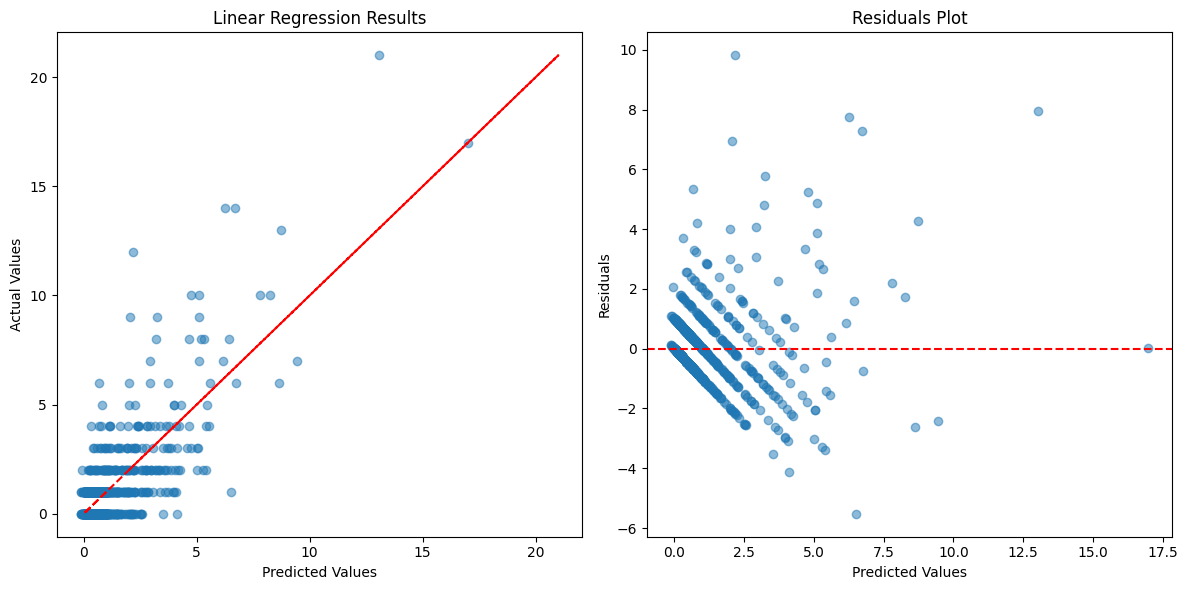

In [101]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Approved_Conversion']]

# Add constant column to X
X = sm.add_constant(X)

# Train the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Plot the predicted values vs. actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values
ax[0].scatter(results.predict(), Y, alpha=0.5)
ax[0].plot(Y, Y, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Linear Regression Results')

# Plot residuals
residuals = results.resid
ax[1].scatter(results.predict(), residuals, alpha=0.5)
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

Conversion Prediction

In [102]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

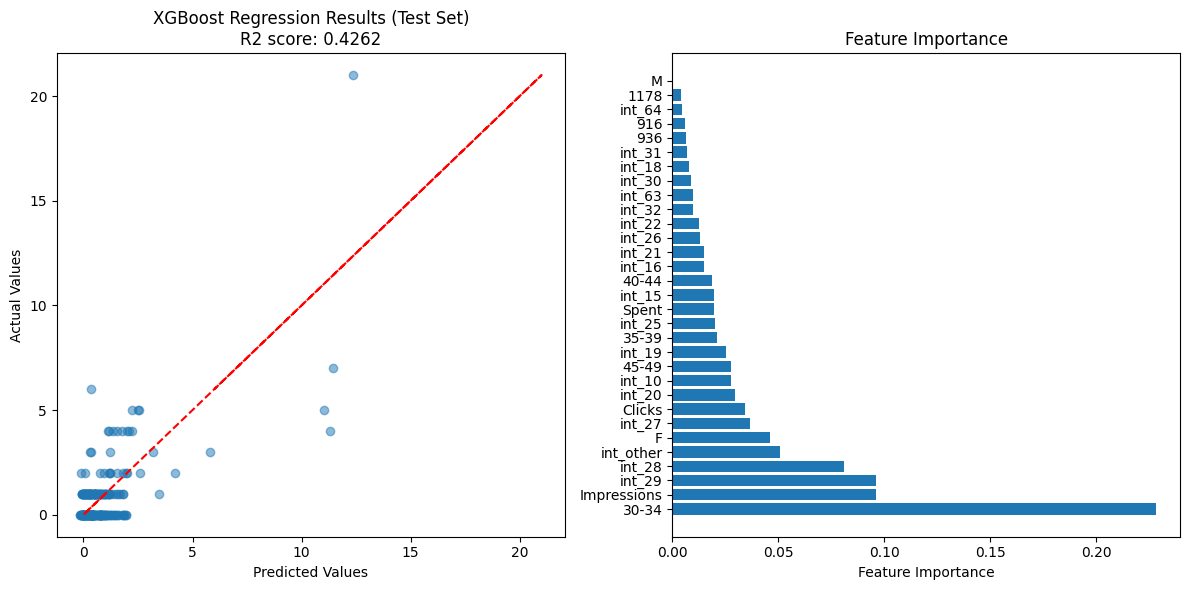

In [103]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Approved_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

# Calculate R2 score for the training set
Y_train_pred = model.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Calculate R2 score for the test set
Y_test_pred = model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Plot the predicted values vs. actual values and feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values for the test set
ax[0].scatter(Y_test_pred, Y_test, alpha=0.5)
ax[0].plot(Y_test, Y_test, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]  # Sort feature indices in descending order
sorted_features = X.columns[sorted_indices]  # Sort feature names based on indices

ax[1].barh(range(len(feature_importance)), feature_importance[sorted_indices])
ax[1].set_yticks(range(len(feature_importance)))
ax[1].set_yticklabels(sorted_features)
ax[1].set_xlabel('Feature Importance')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

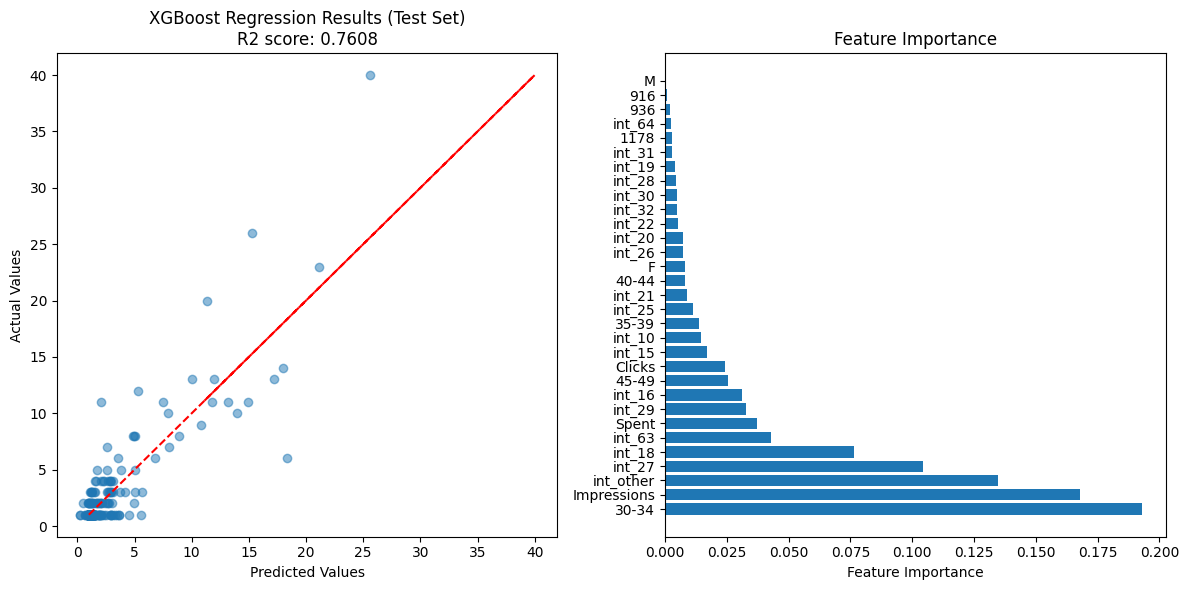

In [104]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Total_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

# Calculate R2 score for the training set
Y_train_pred = model.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Calculate R2 score for the test set
Y_test_pred = model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Plot the predicted values vs. actual values and feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values for the test set
ax[0].scatter(Y_test_pred, Y_test, alpha=0.5)
ax[0].plot(Y_test, Y_test, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]  # Sort feature indices in descending order
sorted_features = X.columns[sorted_indices]  # Sort feature names based on indices

ax[1].barh(range(len(feature_importance)), feature_importance[sorted_indices])
ax[1].set_yticks(range(len(feature_importance)))
ax[1].set_yticklabels(sorted_features)
ax[1].set_xlabel('Feature Importance')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

In [105]:
from sklearn.model_selection import GridSearchCV

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 700}
R2 Score (Test Set): 0.5840046155951266


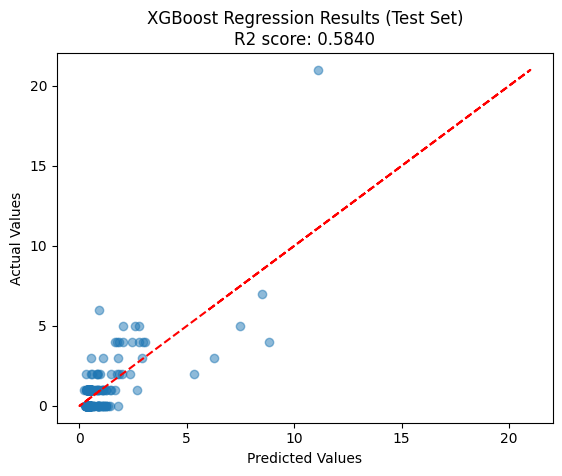

In [106]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Approved_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.1, 0.01, 0.001]
}

# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
grid_search.fit(X_train, Y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Calculate R2 score for the test set using the best model
Y_test_pred = best_model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Print the best hyperparameters and the corresponding R2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("R2 Score (Test Set):", r2_test)

# Plot the predicted values vs. actual values for the test set using the best model
fig, ax = plt.subplots()
ax.scatter(Y_test_pred, Y_test, alpha=0.5)
ax.plot(Y_test, Y_test, color='red', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')
plt.show()

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 900}
R2 Score (Test Set): 0.8194297781782424


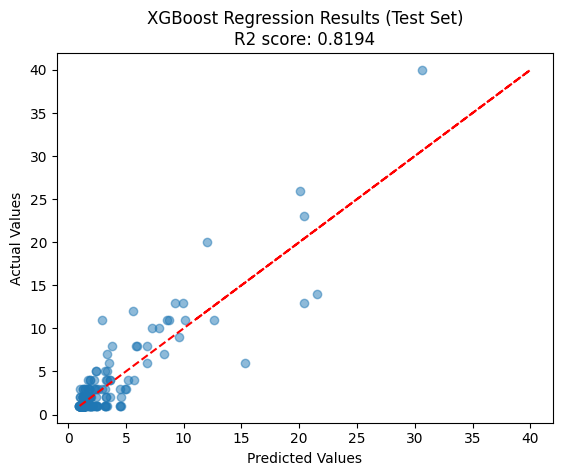

In [107]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = df2[['Total_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [1, 2, 3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
grid_search.fit(X_train, Y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Calculate R2 score for the test set using the best model
Y_test_pred = best_model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Print the best hyperparameters and the corresponding R2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("R2 Score (Test Set):", r2_test)

# Plot the predicted values vs. actual values for the test set using the best model
fig, ax = plt.subplots()
ax.scatter(Y_test_pred, Y_test, alpha=0.5)
ax.plot(Y_test, Y_test, color='red', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')
plt.show()

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

Best R2 Score: 0.8262 at Epoch: 624
Final R2 Score (Test Set): 0.8156


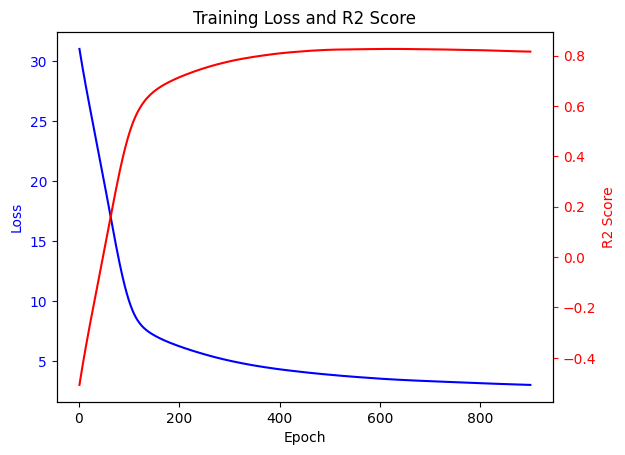

In [109]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1).values
Y = df2[['Total_Conversion']].values

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define the Fully Connected Neural Network (FCNN) model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_size = 73
output_size = 1
learning_rate = 0.001
num_epochs = 900

# Create the FCNN model
model = FCNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_values = []
r2_values = []
best_r2_score = -float('inf')
best_epoch = 0

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the loss value
    loss_values.append(loss.item())

    # Evaluation
    model.eval()
    with torch.no_grad():
        Y_pred_tensor = model(X_test_tensor)
        r2_test = r2_score(Y_test, Y_pred_tensor.numpy())

    # Save the R2 value
    r2_values.append(r2_test)

    # Check if current R2 score is the best so far
    if r2_test > best_r2_score:
        best_r2_score = r2_test
        best_epoch = epoch + 1

# Print the best R2 score and the corresponding epoch
print(f'Best R2 Score: {best_r2_score:.4f} at Epoch: {best_epoch}')

# Print the R2 score on the test set
print(f'Final R2 Score (Test Set): {r2_values[-1]:.4f}')

# Plot the loss values and R2 values
fig, ax1 = plt.subplots()

ax1.plot(range(1, num_epochs + 1), loss_values, 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, num_epochs + 1), r2_values, 'r-')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title('Training Loss and R2 Score')
plt.show()

In [113]:
# Initialize variables to keep track of best model
best_r2_score = -float('inf')
best_epoch = 0
best_model_state = None

# Training loop
for epoch in range(num_epochs):
    # Forward pass, backward pass, optimization

    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        Y_pred_tensor = model(X_test_tensor)
        r2_test = r2_score(Y_test, Y_pred_tensor.numpy())

    # Save the model state if current R2 score is the best so far
    if r2_test > best_r2_score:
        best_r2_score = r2_test
        best_epoch = epoch + 1
        best_model_state = model.state_dict()

# Save the best model to disk
if best_model_state is not None:
    torch.save(best_model_state, 'best_model.pth')

# Print the best R2 score and the corresponding epoch
print(f'Best R2 Score: {best_r2_score:.4f} at Epoch: {best_epoch}')


Best R2 Score: 0.8156 at Epoch: 1


In [114]:
import torch
import pickle

# Initialize variables to keep track of best model
best_epoch_to_save = 624

# Training loop
for epoch in range(num_epochs):
    # Forward pass, backward pass, optimization

    # Evaluation on test set at specific epoch
    if epoch == best_epoch_to_save:
        model.eval()
        with torch.no_grad():
            Y_pred_tensor = model(X_test_tensor)
            r2_test = r2_score(Y_test, Y_pred_tensor.numpy())

        # Create a dictionary containing both model state and training data
        model_data_dict = {
            'model_state': model.state_dict(),
            'training_data': (X_train_tensor, Y_train_tensor)
        }

        # Save the model state and training data at the specific epoch
        with open(f'model_and_data_at_epoch_{epoch}.pkl', 'wb') as f:
            pickle.dump(model_data_dict, f)

    # Early stopping at specific epoch
    if epoch >= best_epoch_to_save:
        break
